In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from Plots import *

from DataProduction import *

from SupportingFunctions import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler=MinMaxScaler()
# run_list=[285490,286498,287987,288543,289413,289733,291970,293528]
run_list=[285490,286498,287987,288543,289413,289733,291970,293528]
color_list_=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan']
from scipy.special import kl_div,softmax

from scipy.spatial.distance import euclidean,jensenshannon


In [2]:
dataProduction=dataProd()
mix_=dataProduction.multipleRun(285490,286498,287987,288543,289413,289733,291970,293528)
mix=mix_.copy()

In [3]:
# #T-Test
# # scipy.stats.ttest_ind(mix[285490,'PedestalValue'].fillna(0),mix[286498,'PedestalValue'].fillna(0))

# #Outlier Counter
# # outlierCounter(mix[285490])



# #all the pedestal values, averaged to plot euclidian distance between each runs to the other runs.
# pedestalOnly=pd.DataFrame(index=np.arange(mix.shape[0]))

# for i,v in enumerate(run_list):
#     pedestalOnly[f'Run{i+1}']=mix[v]['PedestalValue'].values

# pedestalOnly=pedestalOnly.fillna(0).abs()
    

# metrics=[euclidean]

# for metric in metrics:
#     distances=[]
#     for i in pedestalOnly.columns:
#         for j in pedestalOnly.columns:
#             distances.append(metric(pedestalOnly[i], pedestalOnly[j]))

#     euclidian_=pd.DataFrame(np.array(distances).reshape(8,8),index=pedestalOnly.columns,columns=pedestalOnly.columns)
#     sns.heatmap(euclidian_,annot=True,fmt='.2f',cmap='Greens',linewidths=0.5,linecolor='black')
#     plt.title(str(metric).split(' ')[1])
#     plt.show()


In [4]:
# pd.plotting.boxplot(pedestalOnly_)
# pedestalOnly_.plot(kind='hist',bins=100,subplots=True,figsize=(12,8))
# plt.show()

In [5]:
# #rmse time evolution - Run1 being the benchmark
# # shows how far the distributions are
# rmse_list=[]
# for i in pedestalOnly_.columns:
#     rmse = np.sqrt(np.mean((pedestalOnly_['Run1'] - pedestalOnly_[i])**2))
#     rmse_list.append(rmse)

# sns.lineplot(rmse_list)

In [6]:
pedestalOnly=pd.DataFrame(index=np.arange(18)+1)
planes_list=['UTaX', 'UTaU', 'UTbV', 'UTbX']

for i,v in enumerate(run_list):
    for plane in planes_list:
        temp_=mix[v].loc[(mix[v,'Plane']==plane)][['Side','Position','PedestalValue']]
        temp_['Stave']=temp_['Side']+temp_['Position'].astype(str)
        temp_.drop(['Side','Position'],axis=1,inplace=True)
        pedestalOnly[['Stave','Run'+str(i+1)+'_'+plane]]=temp_.groupby(['Stave']).agg('mean')['PedestalValue'].reset_index()




pedestalOnly_=pedestalOnly.drop(['Stave'],axis=1).fillna(0)

probabilities_=pd.DataFrame(softmax(pedestalOnly_),columns=pedestalOnly_.columns,index=np.arange(18)+1)

In [7]:
probabilities_

,Run1_UTaX,Run1_UTaU,Run1_UTbV,Run1_UTbX,Run2_UTaX,Run2_UTaU,Run2_UTbV,Run2_UTbX,Run3_UTaX,Run3_UTaU,...,Run6_UTbV,Run6_UTbX,Run7_UTaX,Run7_UTaU,Run7_UTbV,Run7_UTbX,Run8_UTaX,Run8_UTaU,Run8_UTbV,Run8_UTbX
1,0.000830,0.000854,0.001180,0.000964,0.000820,0.001136,0.001239,0.000579,0.000917,0.000961,...,0.001163,0.000673,0.000828,0.001288,0.001332,0.000616,0.017624,0.008705,0.023592,0.005205
2,0.001120,0.001073,0.001012,0.001018,0.000858,0.000792,0.000765,0.000698,0.000453,0.000512,...,0.001257,0.001176,0.001188,0.000891,0.000927,0.001111,0.001028,0.000625,0.001259,0.000974
3,0.001319,0.001247,0.001201,0.001419,0.000795,0.000714,0.000530,0.000652,0.000653,0.000574,...,0.001197,0.001306,0.001004,0.000877,0.000954,0.000942,0.000870,0.000897,0.000797,0.000606
4,0.001427,0.001167,0.001213,0.001691,0.000779,0.000728,0.000524,0.000774,0.000595,0.000649,...,0.001137,0.001741,0.001174,0.000888,0.000863,0.001119,0.000940,0.000610,0.000872,0.000992
5,0.001667,0.001625,0.001622,0.001623,0.000535,0.000627,0.000698,0.000875,0.000400,0.000429,...,0.001508,0.001611,0.000964,0.000853,0.000872,0.001215,0.000553,0.000632,0.000819,0.001659
6,0.001269,0.001200,0.001119,0.018724,0.000663,0.000670,0.000719,0.000725,0.000558,0.000567,...,0.001197,0.001256,0.000912,0.000913,0.000959,0.000984,0.000490,0.001039,0.000725,0.000744
7,0.001673,0.001090,0.001105,0.001546,0.000717,0.000673,0.000536,0.000688,0.000572,0.000744,...,0.001171,0.001583,0.001260,0.001029,0.000875,0.001320,0.003172,0.000857,0.000871,0.001987
8,0.000998,0.001199,0.001500,0.001451,0.000975,0.001383,0.000601,0.000636,0.000889,0.001110,...,0.001340,0.001217,0.000962,0.001453,0.000969,0.001040,0.002038,0.027168,0.000650,0.000475
9,0.000910,0.000933,0.001102,0.001043,0.000655,0.001054,0.001241,0.001030,0.000741,0.000890,...,0.001460,0.001139,0.000737,0.001280,0.001322,0.001005,0.011611,0.023990,0.038758,0.020343
10,0.001309,0.001170,0.000832,0.000865,0.000835,0.000689,0.001048,0.000653,0.000577,0.000533,...,0.001360,0.000686,0.000962,0.000921,0.001340,0.000727,0.000329,0.000554,0.022216,0.208594


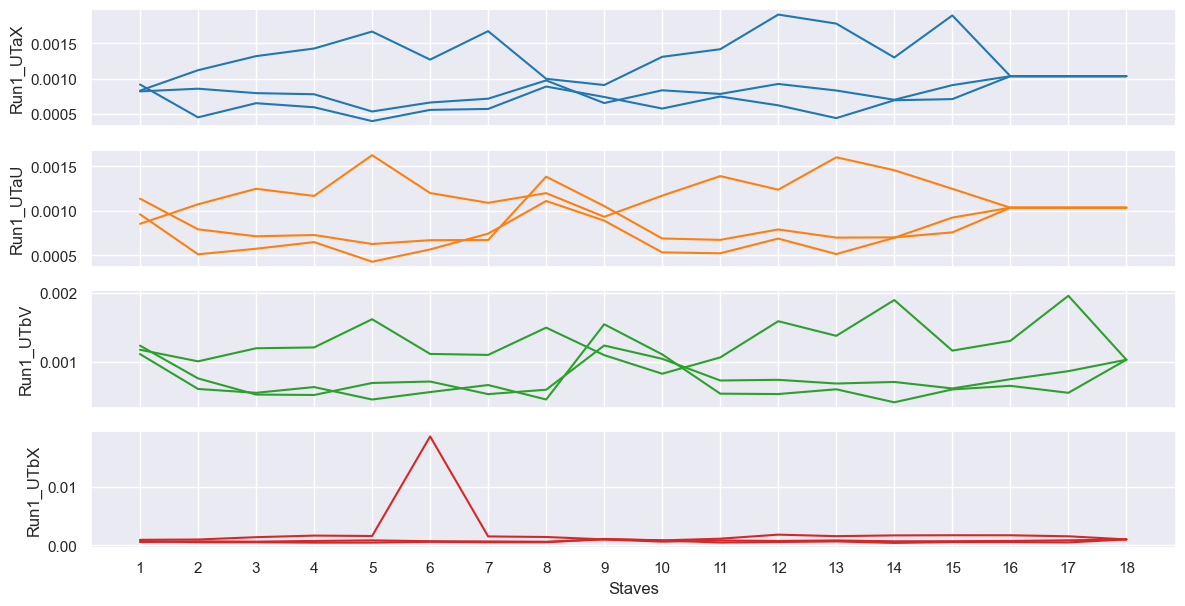

In [8]:
color_list_=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan']
fig,ax=plt.subplots(4,1,figsize=(14,7),sharex=True,)# sharey=True, )
axes = ax.flatten()
for i,v in enumerate(planes_list):
    sns.lineplot(x=probabilities_.index,y=probabilities_['Run1_'+v],ax=axes[i],color=color_list_[i])
    sns.lineplot(x=probabilities_.index,y=probabilities_['Run2_'+v],ax=axes[i],color=color_list_[i])
    sns.lineplot(x=probabilities_.index,y=probabilities_['Run3_'+v],ax=axes[i],color=color_list_[i])
    axes[i].set_xticks(probabilities_.index)
    axes[i].set_xticklabels(probabilities_.index)
plt.xlabel('Staves')
plt.savefig('/Users/sabinhashmi/Drive/Projects/ut-decision-maker/Notebooks/Plots/PedastalPerStave.png',bbox_inches='tight',format='png', transparent=True)
plt.show()

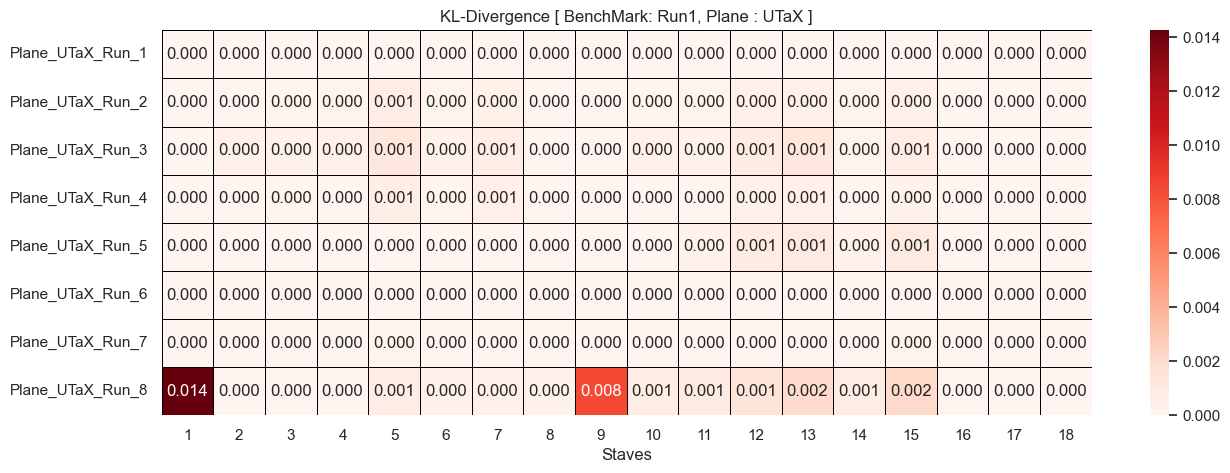

In [9]:
#KL-Divergence for UTaX Plane
kl_div_data=pd.DataFrame(index=np.arange(1,19))
for i in np.arange(8):
    kl_div_data['Plane_UTaX_Run_'+str(i+1)]=kl_div(probabilities_['Run1_UTaX'],probabilities_['Run'+str(i+1)+'_UTaX'])

plt.title('KL-Divergence [ BenchMark: Run1, Plane : UTaX ]')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f')
plt.xlabel('Staves')
plt.savefig('/Users/sabinhashmi/Drive/Projects/ut-decision-maker/Notebooks/Plots/KL-UTaX.png',bbox_inches='tight',format='png', transparent=True)
plt.show()

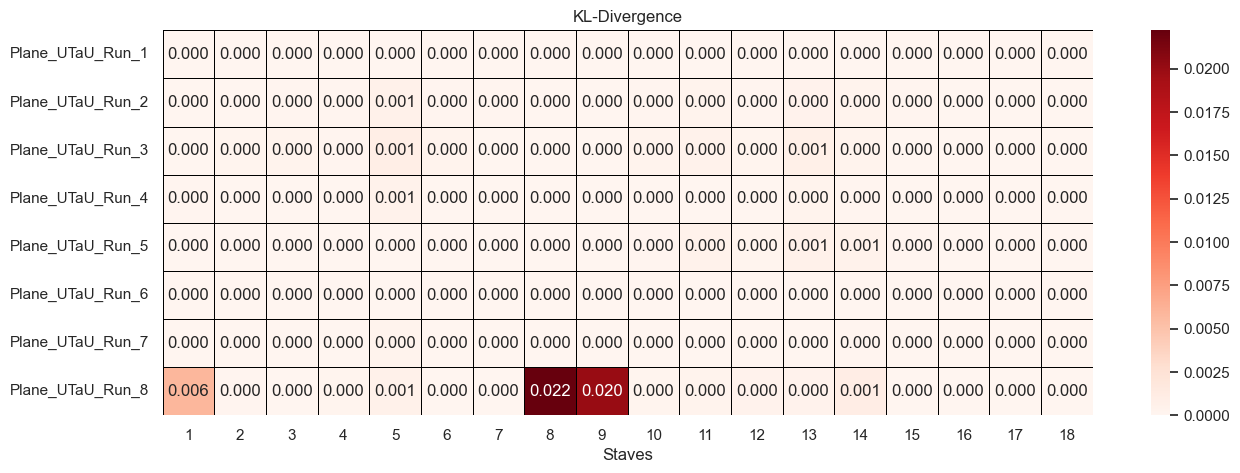

In [10]:
#KL-Divergence for UTaU Plane
kl_div_data=pd.DataFrame(index=np.arange(1,19))
for i in np.arange(8):
    kl_div_data['Plane_UTaU_Run_'+str(i+1)]=kl_div(probabilities_['Run1_UTaU'],probabilities_['Run'+str(i+1)+'_UTaU'])

plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f')
plt.xlabel('Staves')
plt.show()

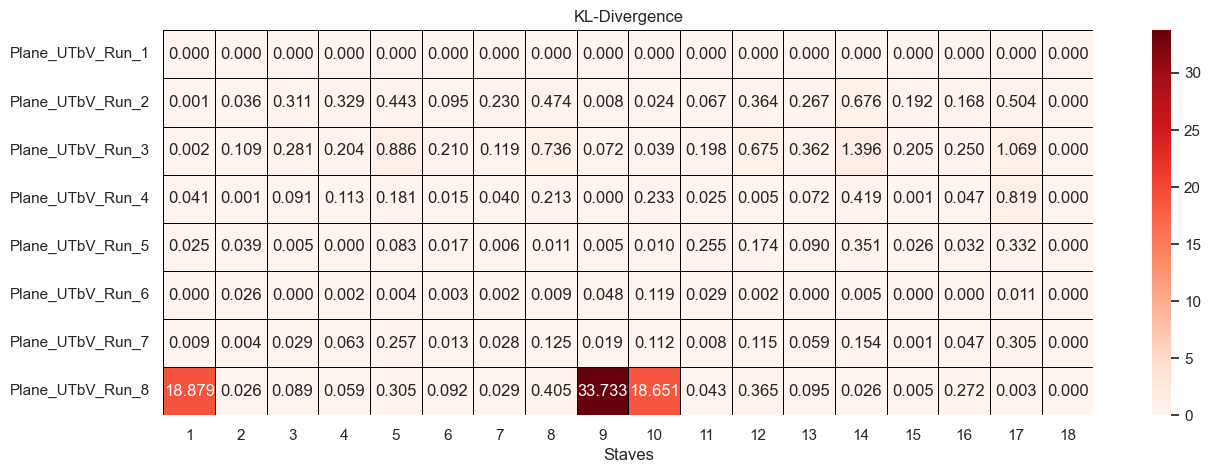

In [11]:
#KL-Divergence for UTbV Plane
kl_div_data=pd.DataFrame(index=np.arange(1,19))
for i in np.arange(8):
    kl_div_data['Plane_UTbV_Run_'+str(i+1)]=kl_div(probabilities_['Run1_UTbV'],probabilities_['Run'+str(i+1)+'_UTbV'])

plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T*1000,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f')
plt.xlabel('Staves')
plt.show()

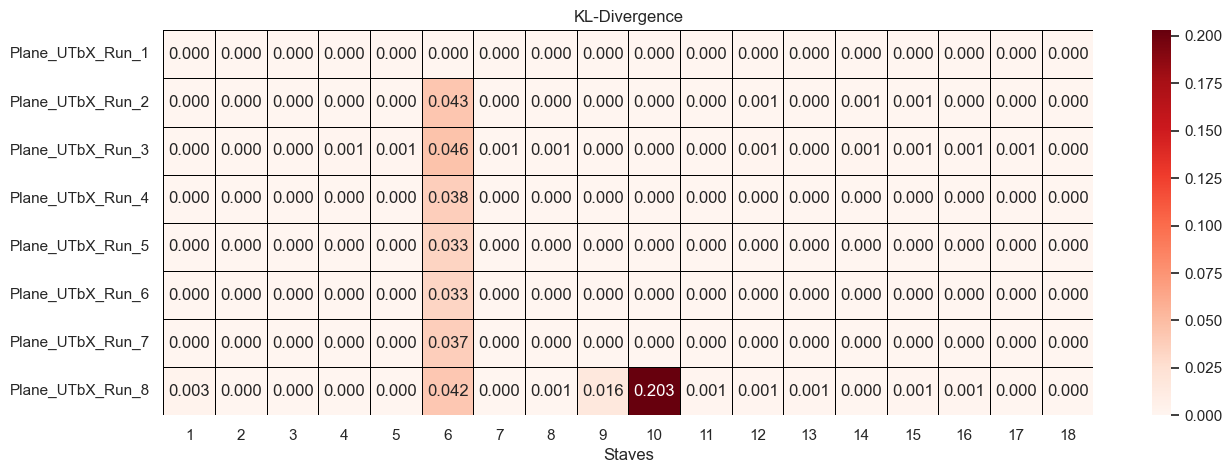

In [12]:
#KL-Divergence for UTbX Plane
kl_div_data=pd.DataFrame(index=np.arange(1,19))
for i in np.arange(8):
    kl_div_data['Plane_UTbX_Run_'+str(i+1)]=kl_div(probabilities_['Run1_UTbX'],probabilities_['Run'+str(i+1)+'_UTbX'])

plt.title('KL-Divergence')
sns.heatmap(kl_div_data.T,cmap='Reds',xticklabels=True, yticklabels=True,linewidths=0.5,linecolor='black',annot=True,fmt='0.3f')
plt.xlabel('Staves')
plt.show()